For this code to be working, in the `order_flow_stylized_facts.py` file, replace

```
from realism_utils import get_plot_colors
from util.formatting.convert_order_stream import dir_path
sys.path.append("..")
```

with (respecting order of lines)

```
sys.path.append("/path_to_fintech-capstone_folder")
from realism.realism_utils import get_plot_colors
from util.formatting.convert_order_stream import dir_path
```

and also replace the occurrences of `/path_to_fintech-capstone_folder` in cells 1 & 2 with the correct path

In [1]:
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append("/path_to_fintech-capstone_folder")

from realism.order_flow_stylized_facts import *

In [ ]:
binneds_60 = []
binneds_300 = []
interarrivals = []
output_dir = "/path_to_fintech-capstone_folder/notebooks"

!python /path_to_fintech-capstone_folder/realism/order_flow_stylized_facts.py /path_to_fintech-capstone_folder/data/plotting/level_1/JPM/rmsc02/ -o /path_to_fintech-capstone_folder/visualizations/order_flow/JPM/rmsc02/ -z
bundled_interarrivals_dict = bundled_stream_interarrival_times(unpickle_stream_dfs_to_stream_list("/path_to_fintech-capstone_folder/data/plotting/level_1/JPM/rmsc02/"))
interarrivals.append(bundled_interarrivals_dict)
binneds_60.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 60))
binneds_300.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 300))

!python /path_to_fintech-capstone_folder/realism/order_flow_stylized_facts.py /path_to_fintech-capstone_folder/data/plotting/level_1/JPM/sparse_zi_100/ -o /path_to_fintech-capstone_folder/visualizations/order_flow/JPM/sparse_zi_100/ -z
bundled_interarrivals_dict = bundled_stream_interarrival_times(unpickle_stream_dfs_to_stream_list("/path_to_fintech-capstone_folder/data/plotting/level_1/JPM/sparse_zi_100/"))
interarrivals.append(bundled_interarrivals_dict)
binneds_60.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 60))
binneds_300.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 300))

!python /path_to_fintech-capstone_folder/realism/order_flow_stylized_facts.py /path_to_fintech-capstone_folder/data/plotting/level_1/GOOG -o /path_to_fintech-capstone_folder/visualizations/order_flow/GOOG/ -z
bundled_interarrivals_dict = bundled_stream_interarrival_times(unpickle_stream_dfs_to_stream_list("/path_to_fintech-capstone_folder/data/plotting/level_1/GOOG/"))
interarrivals.append(bundled_interarrivals_dict)
binneds_60.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 60))
binneds_300.append(bundled_stream_binned_trade_counts(bundled_interarrivals_dict, 300))

In [3]:
PLT_SIZE = 36

plt.rc("font", size=PLT_SIZE)  # controls default text sizes
plt.rc("figure", titlesize=PLT_SIZE)  # fontsize of the figure title
plt.rc("axes", titlesize=PLT_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=PLT_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=PLT_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=PLT_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=PLT_SIZE)  # legend fontsize

Plotting intraday seasonality...


(-0.1, 2.1)

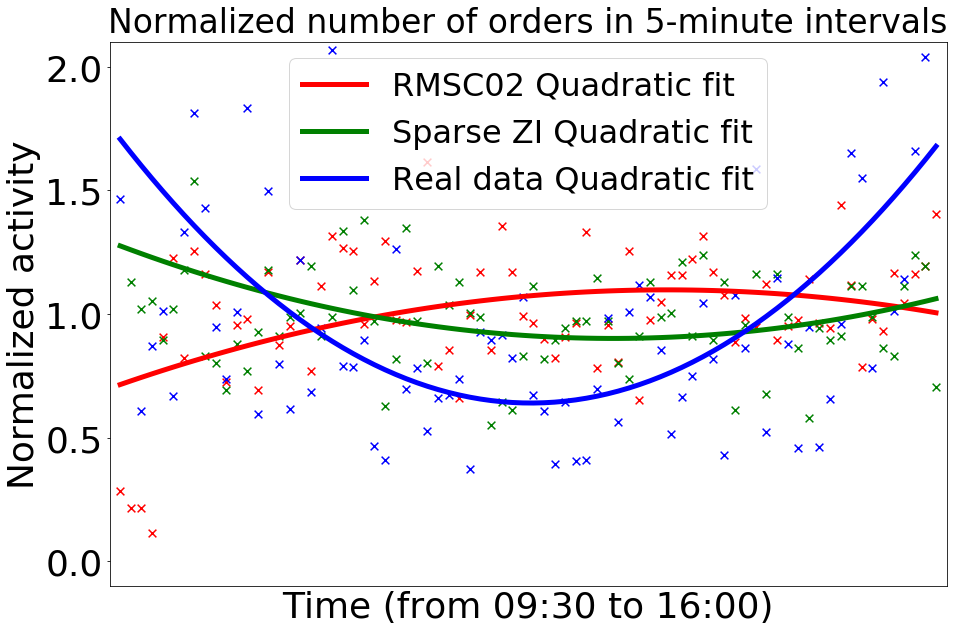

In [4]:
fig, ax = plt.subplots(figsize=(Constants.fig_width, Constants.fig_height))
ax.set_ylabel("Normalized activity")
ax.set_xlabel("Time of day")

myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)
    
print("Plotting intraday seasonality...")
binsize = 300

for ind, binned in enumerate(binneds_300):
    trades_within_bins_dict = binned
    symbols = list(trades_within_bins_dict.keys())
    symbols.sort()

    for symbol, binned_trades in trades_within_bins_dict.items():

        x_fit = []

        for elem in binned_trades.index:
            py_datetime = elem.right.to_pydatetime()
            seconds_from_epoch = py_datetime.timestamp()
            x_fit.append(seconds_from_epoch)

        y = binned_trades.values / np.mean(binned_trades.values)

        start_time_from_epoch = x_fit[0]
        x_fit = np.array(x_fit) - start_time_from_epoch
        quad_coeff = np.polyfit(x_fit, y, 2)
        intraday_quadratic_fitted_y = np.poly1d(quad_coeff)(x_fit)

        plot_ticker_style = get_scatter_plot_params_dict(symbols)
        color = ["red", "g", "b"][ind]  # ["color"]
        marker = plot_ticker_style[symbol]["marker"]
        marker_size = plot_ticker_style[symbol]["marker_size"]

        x = []
        for elem in binned_trades.index:
            x.append(elem.right.time())

        symbol = ["RMSC02", "Sparse ZI", "Real data"][ind]
        plt.scatter(x, y, marker=marker, color=color, s=marker_size)  # , label=symbol
        plt.plot(
            x,
            intraday_quadratic_fitted_y,
            color=color,
            label=f"{symbol} Quadratic fit",
            linewidth=Constants.intraday_volume_linewidth,
        )

plt.legend(fontsize=Constants.legend_font_size, loc="upper center", prop={'size': PLT_SIZE - 4})
plt.title(
    f"Normalized number of orders in 5-minute intervals",
    size=PLT_SIZE - 3,
    pad=10,
)
ax.set_xlabel("Time (from 09:30 to 16:00)")
ax.set_xticks([])
# ax.set_xticklabels([" ", "09:45", "11:00", "12:30", "14:00", "15:15"])
ax.set_xlim(34200, 57900)
ax.set_ylim(-0.1, 2.1)

Plotting 1 minute transaction volumes...


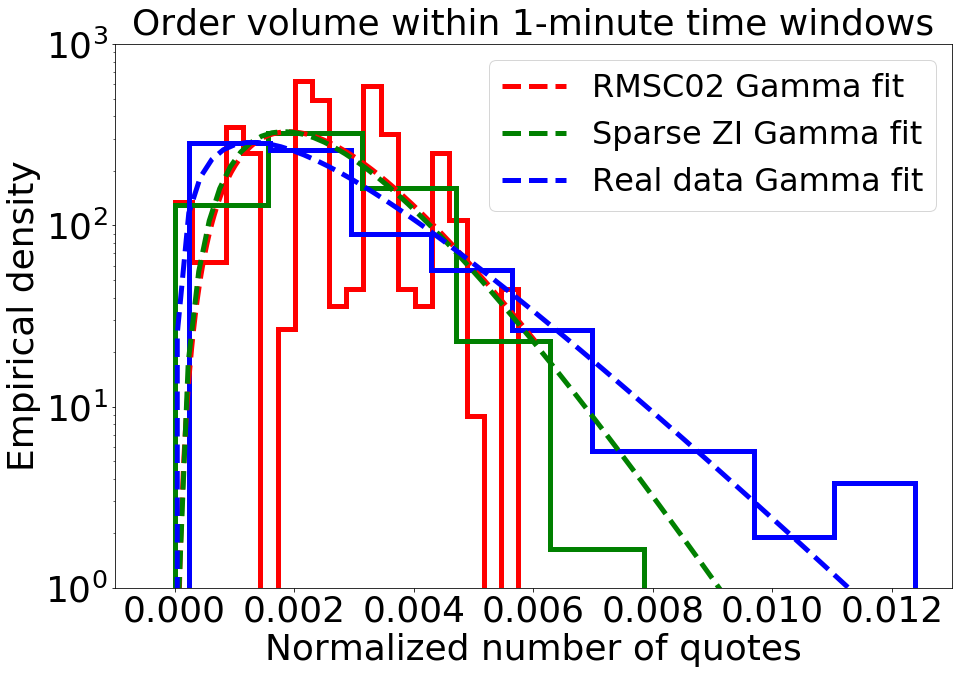

In [5]:
fig, ax = plt.subplots(figsize=(Constants.fig_width, Constants.fig_height))

ax.set(yscale="log")

ax.set_ylabel(Constants.binned_trade_counts_ylabel)
ax.set_xlabel(Constants.binned_trade_counts_xlabel)

print("Plotting 1 minute transaction volumes...")
binwidth = 60

for ind, binned in enumerate(binneds_60):
    trades_within_bins_dict = binned

    symbols = list(trades_within_bins_dict.keys())
    symbols.sort()
    colors = get_plot_colors(symbols)
    alphas = [1] * len(symbols)

    x_s = []
    for symbol, color, alpha in zip(symbols, colors, alphas):
        binned_trades_counts = trades_within_bins_dict[symbol].copy(deep=True)
        binned_trades_counts = binned_trades_counts / binned_trades_counts.sum()
        x = binned_trades_counts.sort_values()
        x_s.append(x)
        plt.hist(
            x,
            bins="sqrt",
            density=True,
            # label=["RMSC02", "Sparse ZI", "Real data"][ind],
            color=["red", "g", "b"][ind],
            alpha=alpha,
            histtype="step",
            linewidth=Constants.binned_count_linewidth,
        )

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 200)

    # Plot fitted curves
    for x, symbol, color in zip(x_s, symbols, colors):
        gamma_params = stats.gamma.fit(x.values[x.values > 0], floc=0)
        plt.plot(
            xx,
            stats.gamma.pdf(xx, *gamma_params),
            linestyle="--",
            color=["red", "g", "b"][ind],
            label=["RMSC02", "Sparse ZI", "Real data"][ind] + " Gamma fit",
            linewidth=Constants.binned_count_linewidth,
        )

ax.set_xlim((-0.001, 0.013))
ax.set_ylim((1, 10**3))

plt.title(
    f"Order volume within 1-minute time windows",  # , normalized",
    size=PLT_SIZE,
    pad=10,
)
plt.legend(fontsize=Constants.legend_font_size, prop={'size': PLT_SIZE - 4})

fig.savefig(
    f"{output_dir}/{Constants.binned_trade_counts_filename}_tau_{binwidth}.png",
    format="png",
    dpi=300,
    transparent=False,
    bbox_inches="tight",
    pad_inches=0.03,
)

Plotting 5 minute transaction volumes...


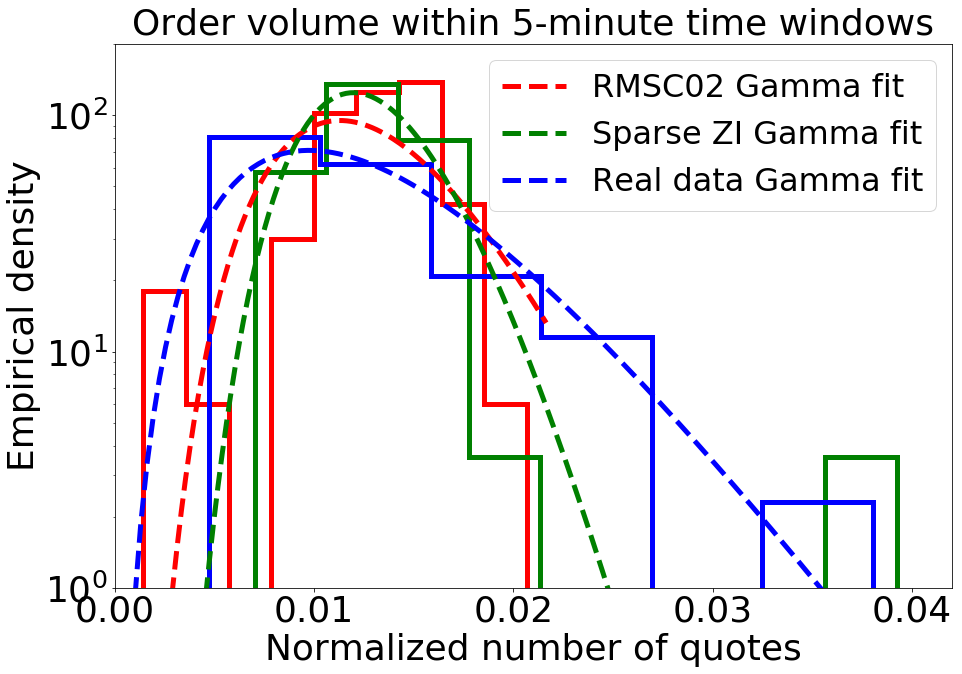

In [6]:
fig, ax = plt.subplots(figsize=(Constants.fig_width, Constants.fig_height))

ax.set(yscale="log")

ax.set_ylabel(Constants.binned_trade_counts_ylabel)
ax.set_xlabel(Constants.binned_trade_counts_xlabel)

print("Plotting 5 minute transaction volumes...")
binwidth = 300

for ind, binned in enumerate(binneds_300):
    trades_within_bins_dict = binned

    symbols = list(trades_within_bins_dict.keys())
    symbols.sort()
    colors = get_plot_colors(symbols)
    alphas = [1] * len(symbols)

    x_s = []
    for symbol, color, alpha in zip(symbols, colors, alphas):
        binned_trades_counts = trades_within_bins_dict[symbol].copy(deep=True)
        binned_trades_counts = binned_trades_counts / binned_trades_counts.sum()
        x = binned_trades_counts.sort_values()
        x_s.append(x)
        plt.hist(
            x,
            bins="sqrt",
            density=True,
            # label=["RMSC02", "Sparse ZI", "Real data"][ind],
            color=["red", "g", "b"][ind],
            alpha=alpha,
            histtype="step",
            linewidth=Constants.binned_count_linewidth,
        )

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 200)

    # Plot fitted curves
    for x, symbol, color in zip(x_s, symbols, colors):
        gamma_params = stats.gamma.fit(x.values[x.values > 0], floc=0)
        plt.plot(
            xx,
            stats.gamma.pdf(xx, *gamma_params),
            linestyle="--",
            color=["red", "g", "b"][ind],
            label=["RMSC02", "Sparse ZI", "Real data"][ind] + " Gamma fit",
            linewidth=Constants.binned_count_linewidth,
        )

ax.set_ylim((1, 2 * 10**2))
ax.set_xlim((0, 0.042))

plt.title(
    f"Order volume within 5-minute time windows",  # , normalized",
    size=PLT_SIZE,
    pad=10,
)
plt.legend(fontsize=Constants.legend_font_size, prop={'size': PLT_SIZE - 4})

fig.savefig(
    f"{output_dir}/{Constants.binned_trade_counts_filename}_tau_{binwidth}.png",
    format="png",
    dpi=300,
    transparent=False,
    bbox_inches="tight",
    pad_inches=0.03,
)

Plotting interarrivals times...


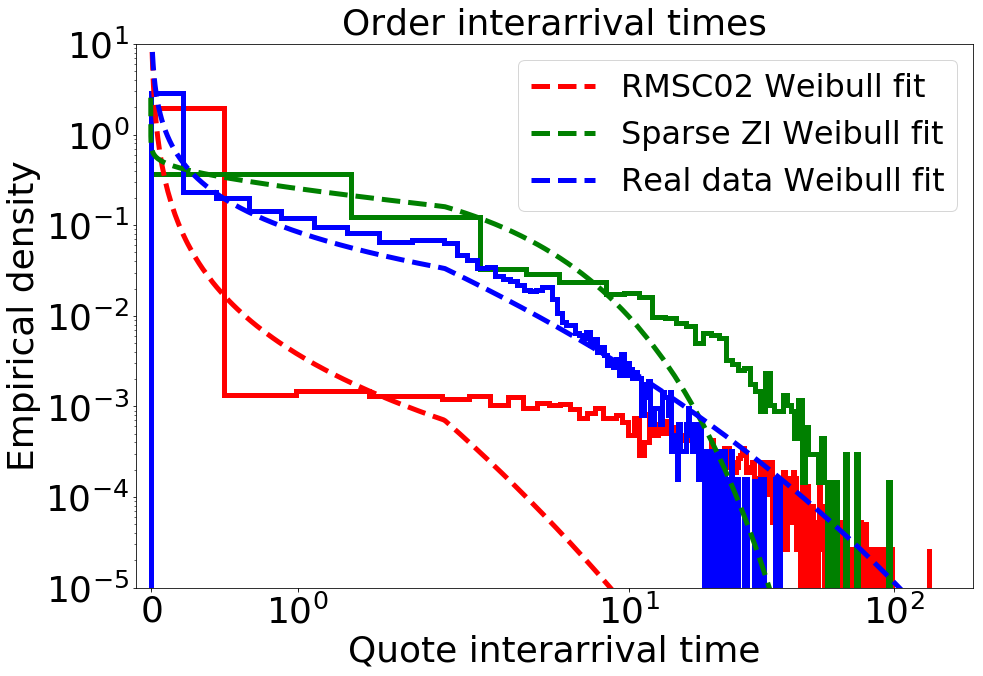

In [7]:
print("Plotting interarrivals times...")

fig, ax = plt.subplots(figsize=(Constants.fig_width, Constants.fig_height))

scale = "log"

if scale == "log":
    ax.set(xscale="symlog", yscale="log")

ax.set_ylabel(Constants.interarrival_times_ylabel)
ax.set_xlabel(Constants.interarrival_times_xlabel)

for ind, interarrival in enumerate(interarrivals):
    interarrivals_dict = interarrival
    symbols = list(interarrivals_dict.keys())
    symbols.sort()
    colors = get_plot_colors(symbols)
    alphas = [1] * len(symbols)

    x_s = []

    for symbol, color, alpha in zip(symbols, colors, alphas):
        interarrival_times_series = interarrivals_dict[symbol]
        x = interarrival_times_series.sort_values()
        x_s.append(x)
        plt.hist(
            x,
            bins="sqrt",
            density=True,
            # label=["RMSC02", "Sparse ZI", "Real data"][ind],
            color=["red", "g", "b"][ind],
            alpha=alpha,
            histtype="step",
            linewidth=Constants.interarrival_linewidth,
        )

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()

    xx = np.linspace(*xlim, 200)

    # Plot fitted curves, leave out zeroes for better fit
    for x, symbol, color in zip(x_s, symbols, colors):
        x = x[(x > Constants.interarrival_fit_lower_bound) & (x < Constants.interarrival_fit_upper_bound)]
        weibull_params = stats.weibull_min.fit(x, floc=0)

        x_left = xx[xx < x.min()][1:]
        x_mid = x.to_numpy()
        x_right = xx[xx > x.max()]
        xxx = np.concatenate((x_left, x_mid, x_right))

        plt.plot(
            xxx,
            stats.weibull_min.pdf(xxx, *weibull_params),
            linestyle="--",
            color=["red", "g", "b"][ind],
            label=["RMSC02", "Sparse ZI", "Real data"][ind] + " Weibull fit",
            linewidth=Constants.interarrival_linewidth,
        )

plt.title(
    f"Order interarrival times",
    size=PLT_SIZE,
    pad=10,
)
plt.legend(fontsize=Constants.legend_font_size, prop={'size': PLT_SIZE - 4})
ax.set_ylim((10**-5, 10))
ax.set_xlim((-0.1, 2*10**2))
ax.set_xlabel("Quote interarrival time")
fig.savefig(
    f"{output_dir}/{Constants.interarrival_times_filename}.png",
    format="png",
    dpi=300,
    transparent=False,
    bbox_inches="tight",
    pad_inches=0.03,
)